# CMSC478 Machine Learning - Spring 2020

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-3: Dimensionality Reduction with PCA and Image Segmentation with K-Means and GMM</font>

## Overview and Learning Objectives

In Assignment-3, you're going to perform dimensionality reduction using PCA, as well as image segmentation using K-Means and GMM.

Pedagogically, this assignment will help you:
- practice PCA.
- pratice K-Means and GMM using scikit-learn.

To help you better understand how image segmentation is performed in scikit-learn, Part II image segmentation is provided more similar to a tutorial than an assignment. You still need to complete Part II and generate all the outputs.

## Part I - PCA

First download the [data](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-3/diabetes.csv). You can read the descriptions of data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

## <font color="red"> Required Coding

In [0]:
# Import necessary Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
# Load diabetes data with Pandas
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# Create X, y - Outcome is the target
X = diabetes_data.drop(['Outcome'], axis = 1)
y = diabetes_data['Outcome']

In [0]:
# Split the data to train and test with a ratio of 0.3 for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 420)

In [0]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(random_state = 420)

> You may need to fine-tune your model to get at least 0.82 for mean auc score in cv.

In [6]:
# Perform a 10-fold cross validation with 'roc_auc' as scoring - CV should be on the whole dataset
rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = "roc_auc")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.8303376068376067


> You can now use `feature_importances_` to see the importance of each feature in the random forest classifier. As mentioned in the lecture, it is measured based on how much the tree nodes that use that feature reduce impurity on average.

In [7]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train, y_train)

# Get feature_importances for all features using random forest classifier
print(rf_clf.feature_importances_)

[0.08362111 0.25271877 0.08782039 0.07715133 0.0702634  0.17518879
 0.12711545 0.12612077]


> Now, plot the ROC curve of random forest. Plot should be complete (including title, axis labels, etc).

Text(0.5, 0, 'False Positive Rate')

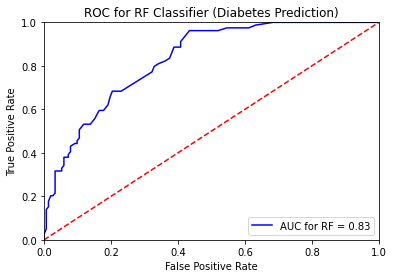

In [8]:
# Plot the complete ROC
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
plt.title('ROC for RF Classifier (Diabetes Prediction)')
plt.plot(rf_fpr, rf_tpr, 'blue', label = 'AUC for RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Next, it's time to do dimensionality reduction using PCA.

In [9]:
# Create a pca with 4 principal components, and apply it on X and store the transformed data in X4D
pca = PCA(n_components = 4)
X4D = pca.fit_transform(X)
print(X4D.shape)

(768, 4)


In [10]:
X4D[0]

array([-75.71465491, -35.95078264,  -7.26078895,  15.66926931])

In [11]:
# Check the pca components
pca.components_.T[:,0]

array([-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,  6.07566861e-02,
        9.93110844e-01,  1.40108085e-02,  5.37167919e-04, -3.56474430e-03])

In [12]:
# Split the X4D to train and test
X4D_train, X4D_test, y_train, y_test = train_test_split(X4D, y, test_size = 0.33, random_state = 420)

print(X4D_train.shape)
print(y_train.shape)
print(X4D_test.shape)
print(y_test.shape)

(514, 4)
(514,)
(254, 4)
(254,)


>You can see the coefficients of each Principal Component (PC) corresponding to each feature as each PC is a linear combination of features.

In [13]:
pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC-1,-0.002022,0.097812,0.016093,0.060757,0.993111,0.014011,0.000537,-0.003565
PC-2,-0.022649,-0.972210,-0.141909,0.057861,0.094627,-0.046973,-0.000817,-0.140168
PC-3,-0.022465,0.143429,-0.922467,-0.307013,0.020977,-0.132445,-0.000640,-0.125454
PC-4,-0.049046,0.119830,-0.262743,0.884369,-0.065550,0.192802,0.002699,-0.301024


>As discussed in the lecture, once you get your X4D, you can see the `explained_variance_ratio_` which shows the ratio of variance preserved in each Principal Component (PC).

In [14]:
pca.explained_variance_ratio_

array([0.88854663, 0.06159078, 0.02579012, 0.01308614])

## Part I - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q1 [10 points]** - Specify for each PC, which feature has the highest correlation with the corresponding PC? You should name the feature that has the highest coefficient in the dataframe above - the one which has PCs as rows.

Answer: 

**PC-1: `Insulin` (0.993111)**

**PC-2: `Glucose` (-0.972210)**

**PC-3: `BloodPressure` (-0.922467)**

**PC-4: `SkinThickness` (0.884369)**

**Q2 [10 points]** - Which of the 8 features has the highest importance in random forest `feature_importances_` which also has a high correlation with one of the 4 PCs returned by PCA? Notice that this can be an indication of consistency between PCA results and `feature_importances_` of rf classifier.

Answer:
**`Glucose` has the highest feature importance of the 8 features, with a high value of 0.25271877. Not coincidentailly, the second principal component has `Glucose` as the highest correlated feature as well, with a value of -0.972210.**

**Q3 [20 points]** - Compare the mean cv score (using roc_auc as scoring) of random forest classifier using only 1 principal component, versus 2, 3, and 4 prinicipal compenents. Use the cell below to write all necessary code to answer this question. Compare your results with `explained_variance_ratio_` and infer the optimal number of principal components based on your comaprison. GIVE COMPLETE ANSWER WITH ARGUMENTS AND REASONING! No partial credit for incomplete answers!

Answer: 
**The optimal number of principal components appears to be 4 (among the choices given). Looking at the cross validation scores for each PCA reduction, the highest area under the ROC curve occurs when there are 4 principal components. Given that onset diabetes is presumably a complicated thing to detect, it makes sense that retaining more important features would lead to better predictions by the model. Going downward from 4 to 1, we can see that the mean cross validation score falls off noticeably. This is similar to data compression, where lossiness becomes more severe as the consolidation becomes more severe. `explained_variance_ratio_` confirms our observations, since the sum of the variances retained per dimension is 0.98901367. This means that a PC reduction into 4 components retained 98.9% of the variance, and maintaining high variance through the reduction is essential for building a better model in cases where PCA is used.**  

## <font color="red"> Required Coding

In [15]:
# Write all the necessary code to answer Q3 on comparing different number of PCs (1 to 4).
# You should compare based on mean cv score using 'roc_auc' as scoring and 10 fold cv

X3D = PCA(n_components = 3).fit_transform(X)
X2D = PCA(n_components = 2).fit_transform(X)
X1D = PCA(n_components = 1).fit_transform(X)

rf_cv_score_X4D = cross_val_score(rf_clf, X4D, y, cv = 10, scoring = "roc_auc")
rf_cv_score_X3D = cross_val_score(rf_clf, X3D, y, cv = 10, scoring = "roc_auc")
rf_cv_score_X2D = cross_val_score(rf_clf, X2D, y, cv = 10, scoring = "roc_auc")
rf_cv_score_X1D = cross_val_score(rf_clf, X1D, y, cv = 10, scoring = "roc_auc")

print(rf_cv_score_X4D.mean())
print(rf_cv_score_X3D.mean())
print(rf_cv_score_X2D.mean())
print(rf_cv_score_X1D.mean())

0.7739843304843305
0.7624715099715099
0.7585227920227919
0.6577364672364673


## Part II - Image Segmentation with K-Means and GMM

In Part II, you're going to perform image segmentation using K-Means algorithm and Gaussian Mixture Models (GMM).

K-Means was fully explained in the lectures. To use GMM for clustering, one of the main approaches is EM algorithm explained below.

- Expectation Maximization (EM) algorithm attempts estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\sum^{(1)}$ to $\sum^{(k)}$ given the dataset X.


- EM has many similarities with the K-Means algorithm. It initializes the cluster parameters randomly, then it repeats two steps until convergence:
    - First, assigning instances to clusters - this is called the **expectation step**.
    - Then, updating the clusters - this is called the **maximization step**.
    
    
- In the context of clustering, you can think of EM as a generalization of K-Means that not only finds the cluster centers $\mu^{(1)}$ to $\mu^{(k)}$, but also their size, shape, and orientation $\sum^{(1)}$ to $\sum^{(k)}$​, as well as their relative weights $\phi^{(1)}$ to $\phi^{(k)}$.

- Unlike K-Means, EM uses **soft** cluster assignments, not **hard** assignments.


- For each instance, during the **expectation step**, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters).


- Then, during the **maximization step**, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster.


- These probabilities are called the **responsibilities** of the clusters for the instances.


- During the **maximization step**, each cluster’s update will mostly be impacted by the instances it is most **responsible** for.

As discussed in the lectures, there are different applications for clustering. One application is image segmentation which you are going to do on a simple image as practice.

You are going to use the implementations of K-Means and GMM provided in scikit-learn. Let's see one simple example first with K-Means.

> Download [pic.jpeg](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-3/pic.jpeg) and save it in your working directory.

(192, 263, 3)


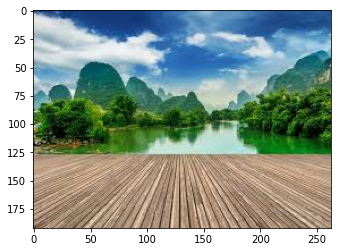

In [16]:
# Load pic - Don't forget to include matplotlib in the 1st cell at the top of the notebook!
pic = plt.imread('pic.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic) 

In [17]:
# Reshape the pic to make it a 2D array
pic_array = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_array.shape

(50496, 3)

In [0]:
# Import K-Means
from sklearn.cluster import KMeans

> Let's try with 5 clusters.

In [0]:
# 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_array)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

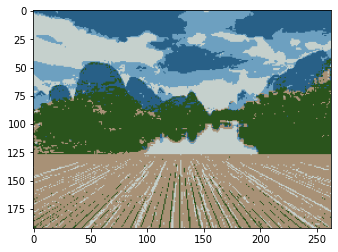

In [20]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

> Looks like a reasonable number of segments/clusters as you have the sky, clouds, trees, lake and the ground. Try with different number of clusters/segments and see the results.

> Now download [cat.jpeg](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-3/cat.jpeg) and save it in your working directory.

(300, 444, 3)


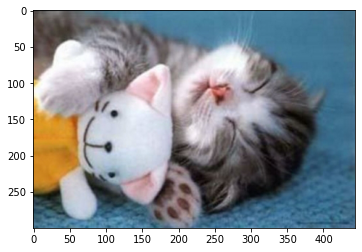

In [21]:
cat = plt.imread('cat.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(cat.shape)
plt.imshow(cat)

## <font color="red"> Required Coding

In [22]:
# Reshape cat to make it a 2D array 
cat_array = cat.reshape(cat.shape[0] * cat.shape[1], cat.shape[2])
cat_array.shape

(133200, 3)

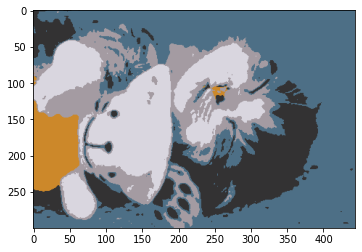

In [23]:
# Apply K-Means algorithms on the cat image with 5 clusters/segments,
# and display the segmented image
kmeans = KMeans(n_clusters = 5, random_state = 420).fit(cat_array)
p1 = kmeans.cluster_centers_[kmeans.labels_]
p_cluster = p1.reshape(cat.shape[0], cat.shape[1], cat.shape[2])
plt.imshow(p_cluster)

> Now let's use [GMM from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [0]:
from sklearn.mixture import GaussianMixture

In [25]:
# create a gm model with 5 clusters
# you may check out the textbook or scikit-learn documentation to see how you can use .fit() method.
gm = GaussianMixture(n_components = 5, random_state = 420)
gm.fit(cat_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=420, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
gm.converged_

True

In [0]:
gm_clusters = gm.predict(cat_array)

In [28]:
gm_clusters.shape

(133200,)

In [29]:
gm_clusters

array([2, 2, 2, ..., 0, 0, 0])

> Now there are two ways to display the segments, both provided below:

(300, 444)


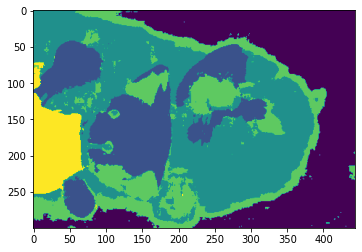

In [30]:
cat_seg_gm = gm_clusters.reshape(cat.shape[0], cat.shape[1])
print(cat_seg_gm.shape)
plt.imshow(cat_seg_gm)

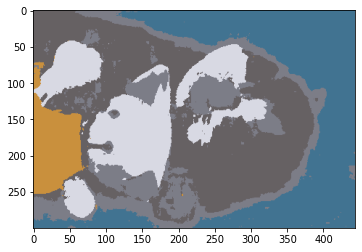

In [31]:
plt.imshow(gm.means_[cat_seg_gm])

> Looks like GMM actually did a better job on segmenting the background (blue carpet) although not so good of a visuall appearance for the cat itself. You can now try with some other images of your choice and have some fun!

## Grading

Assignment-3 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I PCA: 80 points
    - Implementation: 40 points
    - Questions: 40 points

- Part II Image Segmentation using K-Means & GMM - 20 points
    - K-Means: 10 points
    - GMM: 10 points
   

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A3.ipynb```. Submit the completed notebook using the ```Assignment-3``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Thursday March 23, 11:59PM.</b></font>